In [1]:
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height = 9)
# 맥에서는 실행해야 한글이 보임
Sys.setlocale(category = 'LC_ALL',locale = 'ko_KR.UTF-8')

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
# election에 데이터 불러오기
# 선거인수(선거해야할 사람 수), 투표수(투표한 사람의 수)
election <- read.csv("../Data/election_2022.csv")
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


In [3]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [5]:
sum(is.na(election))

[1] 0

In [8]:
# 중복된 시군구의 갯수?
length(election$`시군구`) - length(unique(election$`시군구`))

[1] 22

[1] 248

In [19]:
# 3명의 후보의 투표 합 구하기
election$electionSum <- apply(election[,5:7], 1, sum)

head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417
2,서울특별시,중구,111448,84998,38244,42906,2310,83460
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [27]:
# 3명의 후보가 받은표가 투표수의 몇 퍼센트인지
election$electionRatio <- election[,c("electionSum")] / election[,c("투표수")] * 100

head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [30]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [46]:
# electionRatio가 가장 높은 지역과 가장 낮은 지역 구하기
## 정렬
cat("가장 높은 지역 :", arrange(election, desc(electionRatio))[1,]$광역시도, 
arrange(election, desc(electionRatio))[1,]$시군구, "\n")

cat("가장 낮은 지역 :", arrange(election, desc(electionRatio))[nrow(election),]$광역시도, 
arrange(election, desc(electionRatio))[nrow(election),]$시군구)

## subset
subset(election, electionRatio == max(electionRatio) | electionRatio == min(electionRatio))
# subset(election, electionRatio == min(electionRatio))

가장 높은 지역 : 경기도 성남시분당구 
가장 낮은 지역 : 인천광역시 옹진군

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


---
### 광역시별 투표율을 3D Pie Chart로 표현하기

In [47]:
library(plotrix)

In [58]:
# 1) 광역시별 합계
sumPieChart <- aggregate(투표수 ~ 광역시도, election, sum)
# 2) 광역시별 합계를 높은 순으로 정렬(내림차순)
sumPieChart <- arrange(sumPieChart, desc(투표수))

class(sumPieChart$`투표수`)

[1] "integer"

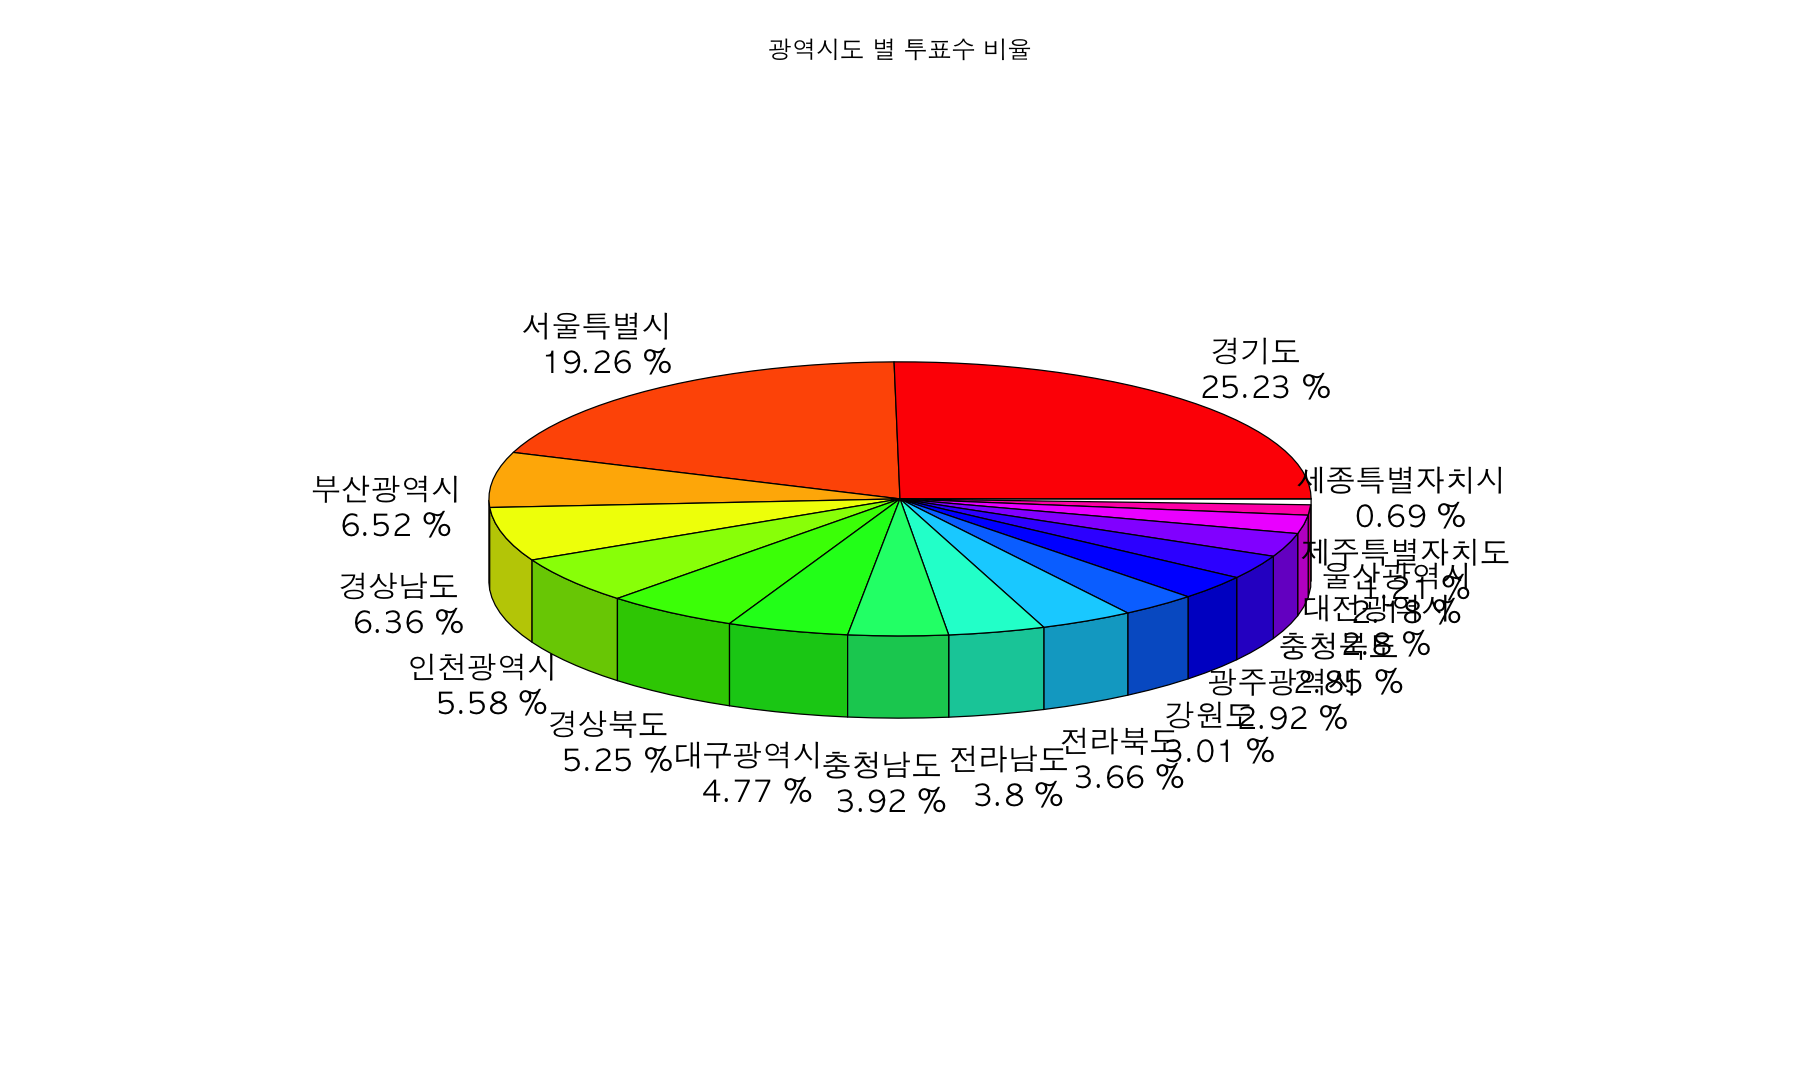

In [83]:
par(bg = "white", family = "AppleGothic")

# sumPieChart$`투표수` / sum(sumPieChart$`투표수`) * 100

label <- paste(
    sumPieChart$`광역시도`, "\n",
    round(sumPieChart$`투표수` / sum(sumPieChart$`투표수`) * 100, 2), "%"
)

pie3D(
    sumPieChart$`투표수`,
    labels = label,
    main = "광역시도 별 투표수 비율"
)


In [76]:
help(pie3D)

pie3D                 package:plotrix                  R Documentation

_D_i_s_p_l_a_y _a _3_D _p_i_e _c_h_a_r_t

_D_e_s_c_r_i_p_t_i_o_n:

     Displays a 3D pie chart with optional labels.

_U_s_a_g_e:

      pie3D(x,edges=NA,radius=1,height=0.1,theta=pi/6,start=0,border=par("fg"),
       col=NULL,labels=NULL,labelpos=NULL,labelcol=par("fg"),labelcex=1.5,
       sector.order=NULL,explode=0,shade=0.8,mar=c(4,4,4,4),pty="s",...)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric vector for which each value will be a sector

   edges: the number of lines forming an ellipse

  radius: the radius of the pie in user units

  height: the height of the pie in user units

   theta: The angle of viewing in radians

   start: The angle at which to start drawing sectors.

  border: The color of the sector border lines

     col: The colors of the sectors

  labels: Optional labels for each sector

labelpos: Optional positions for the labels (see examples)

l